Importing all the necessarry libraries required


In [22]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the dataset

In [23]:
from sklearn.datasets import load_wine
data = load_wine()
wine_data = load_wine()
wine_features = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_target = wine_data.target  # This stores the wine type labels
print(wine_features.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_features)


In [25]:
from bokeh.io import output_notebook  # Import for notebook output
from bokeh.plotting import figure, show

from sklearn.datasets import load_wine
wine_data = load_wine()
wine_features = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Select two features for the pair plot (adjust as desired)
feature1, feature2 = "alcohol", "malic_acid"

# Configure output to notebook
output_notebook()

# Create a new plot with a title
p = figure(title="Wine Features Pair Plot")

# Add circle renderer for each data point
p.circle(x=wine_features[feature1], y=wine_features[feature2], size=10, color="blue", alpha=0.6)

# Label the axes
p.xaxis.axis_label = feature1
p.yaxis.axis_label = feature2

# Show the plot within the notebook
show(p)


Loading BokehJS ...

In [26]:
# Center the data
mean_vector = wine_features.mean(axis=0)
centered_data = wine_features - mean_vector

# Calculate the Covariance Matrix
covariance_matrix = np.cov(centered_data.T)

# Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Choose Principal Components
# Define the number of principal components (k)
k = 2  # You can adjust this value

# Sort eigenvectors by eigenvalues (descending order)
sorted_index = np.argsort(eigenvalues)[::-1]
pcs = eigenvectors[:, sorted_index[:k]]  # Select top 'k' eigenvectors

# Project Data onto Principal Components
transformed_data = centered_data.dot(pcs)

# Print the explained variance ratio (optional)
explained_variance = eigenvalues[sorted_index[:k]] / np.sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.99809123 0.00173592]


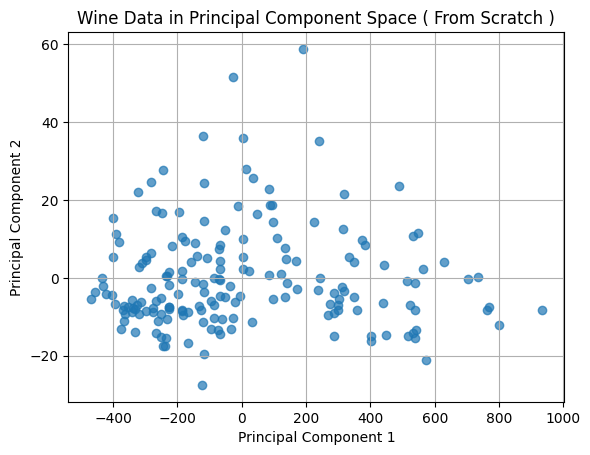

In [34]:
# Select the first two principal components
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]

# Create a scatter plot
plt.scatter(pc1, pc2, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Data in Principal Component Space ( From Scratch )")
plt.grid(True)
plt.show()

## PCA using SK Learn

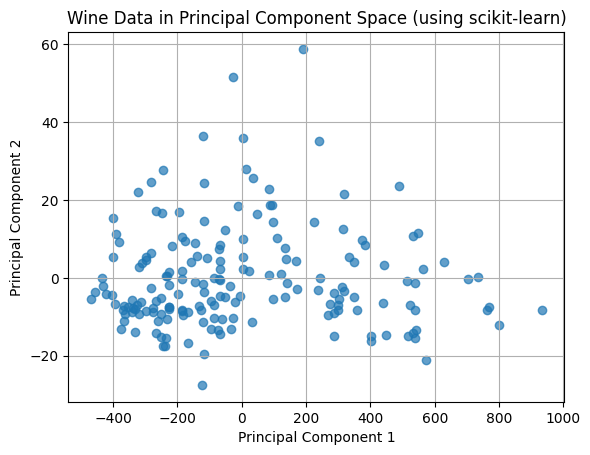

In [35]:
# Define the number of principal components (k)
k = 4  # You can adjust this value

# Create a PCA object
pca = PCA(n_components=k)

# Fit the PCA model to the data
pca.fit(wine_features)

# Transformed data in principal component space
transformed_data = pca.transform(wine_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Sample features (replace with actual feature names)
features = wine_data.feature_names[:3]  # Assuming 3 features for illustration

# Create a scatter plot of the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Data in Principal Component Space (using scikit-learn)")
plt.grid(True)
plt.show()


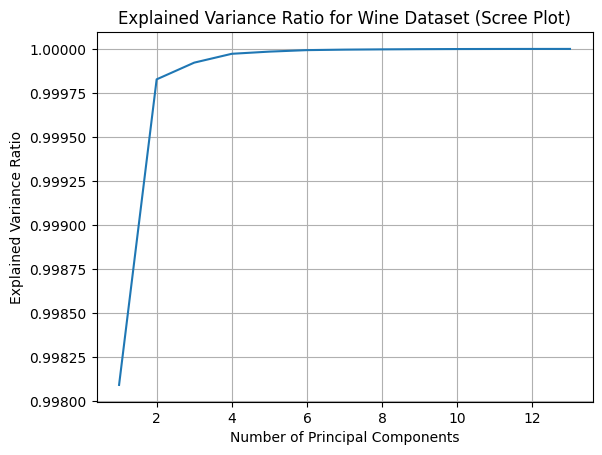

In [32]:
# Define a range of potential values for k
k_range = range(1, len(wine_features.T) + 1)  # Explore all possible values for k

# Create an empty list to store explained variance ratios
explained_variance_ratios = []

# Loop through k values and calculate explained variance ratio
for k in k_range:
  # Create a PCA object with the current k value
  pca = PCA(n_components=k)
  # Fit the PCA model to the data
  pca.fit(wine_features)
  # Get the explained variance ratio for each component
  explained_variance = pca.explained_variance_ratio_
  # Calculate the cumulative explained variance ratio
  cumulative_explained_variance = np.sum(explained_variance)
  # Append the cumulative explained variance ratio to the list
  explained_variance_ratios.append(cumulative_explained_variance)

# Plot the explained variance ratio vs. number of components (scree plot)
plt.plot(k_range, explained_variance_ratios)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Wine Dataset (Scree Plot)")
plt.grid(True)
plt.show()

In [36]:
## EVR Reaching plateau at 6 components, therefore we can choose 6 components and 
## revamp the model with 6 components

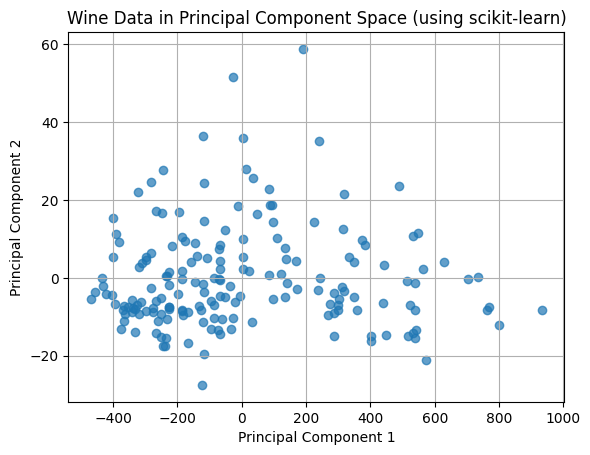

In [37]:
# Define the number of principal components (k)
k = 6  # You can adjust this value

# Create a PCA object
pca = PCA(n_components=k)

# Fit the PCA model to the data
pca.fit(wine_features)

# Transformed data in principal component space
transformed_data = pca.transform(wine_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Sample features (replace with actual feature names)
features = wine_data.feature_names[:3]  # Assuming 3 features for illustration

# Create a scatter plot of the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Wine Data in Principal Component Space (using scikit-learn)")
plt.grid(True)
plt.show()


In [38]:
projected_data = pca.transform(wine_features)

# Reconstruct data from principal components
reconstructed_data = pca.inverse_transform(projected_data)

# Calculate reconstruction error (Mean Squared Error)
error = np.mean((wine_features - reconstructed_data) ** 2)

# Print results
print("Number of Principal Components (k):", k)
print("Reconstruction Error (MSE):", error)


Number of Principal Components (k): 6
Reconstruction Error (MSE): alcohol                         2.495359e-01
malic_acid                      7.048189e-03
ash                             3.967966e-02
alcalinity_of_ash               4.165490e-04
magnesium                       3.618067e-06
total_phenols                   6.331184e-02
flavanoids                      4.566042e-02
nonflavanoid_phenols            9.822593e-03
proanthocyanins                 1.416705e-01
color_intensity                 5.714843e-03
hue                             2.101610e-02
od280/od315_of_diluted_wines    9.329981e-02
proline                         3.244439e-07
dtype: float64


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target, test_size=0.2, random_state=42)

# Classification without PCA (full features)
# Create and train logistic regression model
clf_full = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf_full.fit(X_train, y_train)

# Make predictions on test set
y_pred_full = clf_full.predict(X_test)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Project training and testing data onto principal components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train logistic regression model on reduced dimensions
clf_pca = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf_pca.fit(X_train_pca, y_train)

# Make predictions on test set with reduced dimensions
y_pred_pca = clf_pca.predict(X_test_pca)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# Evaluate classification performance (replace with your preferred metric)
from sklearn.metrics import accuracy_score

accuracy_full = accuracy_score(y_test, y_pred_full)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy (Full Features):", accuracy_full)
print("Accuracy (PCA -", k, "Components):", accuracy_pca)

Accuracy (Full Features): 0.9722222222222222
Accuracy (PCA - 6 Components): 1.0
